## Preambule

In [2]:
import numpy as np
import xarray as xr
from importlib import reload
import pandas as pd
from tqdm import tqdm
import json
from pathlib import Path
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
import Functions
reload(Functions)
from Functions import (pop_func, emis_func, determine_coefficient,
                       popshare_func, emisshare_func, emis_total_func, rho, cumpopshare_func,
                       cumfuturepop_func, emis_f_func, gdp_future, create_groups, gdp_future_reread, grouping, grouping_xarray)

## Run class or read xarray file

In [27]:
import ClassEffortSharing
reload(ClassEffortSharing)
from ClassEffortSharing import shareefforts

efshare = shareefforts()
efshare.define_paths()
efshare.read_countrygroups()
if efshare.reread == True:
    efshare.read_unpop()
    efshare.read_hdi()
    efshare.read_gdp()
    efshare.read_edgar()
    efshare.read_primap()
    efshare.read_ar6()
    efshare.read_rci()
    efshare.read_ndc_cr()
    efshare.read_ndc()
    efshare.read_baseline()
    efshare.concat_xrobject()
    efshare.save_xrs_databases()
else:
    efshare.load_xrs_databases()
efshare.general_calculations()
efshare.save_budgets()
self = efshare

# ==================================== #
# Initializing shareefforts class    #
# ==================================== #
- Defining paths
- Reading country groups
- Load XR databases
- General calculations for effort sharing
- Save budgets


In [16]:
self.yearly_positive_budgets.sel(Category=['C1+C2', "C3", "C5+C6", "C7"], Time=2024)

<xarray.DataArray (Category: 4)>
array([42.40391969, 44.10400496, 47.36695277, 52.28508258])
Coordinates:
    Time      int32 2024
  * Category  (Category) object 'C1+C2' 'C3' 'C5+C6' 'C7'

In [21]:
self.ecpc_average.sel(ISO='FRA', Category=['C1+C2', "C3", "C5+C6", "C7"])# / self.app1_gdp_neg.sum(dim='Time')

<xarray.DataArray (Category: 4)>
array([ 2.86147876,  5.63629199, 15.26547554, 30.71809108])
Coordinates:
    ISO       <U3 'FRA'
  * Category  (Category) object 'C1+C2' 'C3' 'C5+C6' 'C7'

In [24]:
self.ecpc_average.sel(ISO='FRA', Category=['C1+C2', "C3", "C5+C6", "C7"]) + self.app1_gdp_neg.sum(dim='Time').sel(ISO='FRA', Category=['C1+C2', "C3", "C5+C6", "C7"])

<xarray.DataArray (Category: 4)>
array([16.788095  , 17.16537663, 21.63793812, 31.43697324])
Coordinates:
    ISO       <U3 'FRA'
  * Category  (Category) object 'C1+C2' 'C3' 'C5+C6' 'C7'

In [23]:
self.app1_gdp_neg.sum(dim='Time').sel(ISO='FRA', Category=['C1+C2', "C3", "C5+C6", "C7"])

<xarray.DataArray (Category: 4)>
array([13.92661623, 11.52908464,  6.37246258,  0.71888216])
Coordinates:
    ISO       <U3 'FRA'
  * Category  (Category) object 'C1+C2' 'C3' 'C5+C6' 'C7'

In [6]:
self.app1_gdp_pos_total / self.app1_gdp_pos_total.sel(ISO='WORLD')

<xarray.DataArray (Category: 12, ISO: 209)>
array([[9.00293855e-03, 2.41059482e-04, 5.93857884e-03, ...,
        1.21191228e-02, 4.24913391e-02, 1.00000000e+00],
       [8.59450007e-03, 2.33116896e-04, 5.87162480e-03, ...,
        2.37266419e-02, 4.68895387e-02, 1.00000000e+00],
       [8.95715177e-03, 2.49486937e-04, 6.02083217e-03, ...,
        1.80992684e-02, 4.26544995e-02, 1.00000000e+00],
       ...,
       [8.89307520e-03, 2.50025316e-04, 6.02324248e-03, ...,
        2.05389058e-02, 4.32854812e-02, 1.00000000e+00],
       [8.98588089e-03, 2.70658633e-04, 6.18272500e-03, ...,
        2.53445331e-02, 4.17061242e-02, 1.00000000e+00],
       [8.68779869e-03, 2.83840528e-04, 6.22633358e-03, ...,
        3.67419600e-02, 4.38257528e-02, 1.00000000e+00]])
Coordinates:
  * ISO       (ISO) object 'AFG' 'ALB' 'DZA' 'AND' ... 'LDC' 'UM' 'EG' 'WORLD'
  * Category  (Category) object 'C1' 'C2' 'C3' 'C4' ... 'C3+C4' 'C5+C6' 'C7+C8'

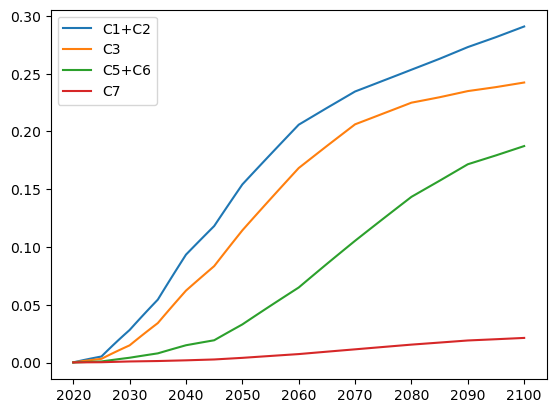

In [30]:
plt.plot(self.app1_gdp_neg.Time, self.app1_gdp_neg.sel(ISO='FRA', Category='C1+C2'), label='C1+C2')
plt.plot(self.app1_gdp_neg.Time, self.app1_gdp_neg.sel(ISO='FRA', Category='C3'), label='C3')
plt.plot(self.app1_gdp_neg.Time, self.app1_gdp_neg.sel(ISO='FRA', Category='C5+C6'), label='C5+C6')
plt.plot(self.app1_gdp_neg.Time, self.app1_gdp_neg.sel(ISO='FRA', Category='C7'), label='C7')
plt.legend()

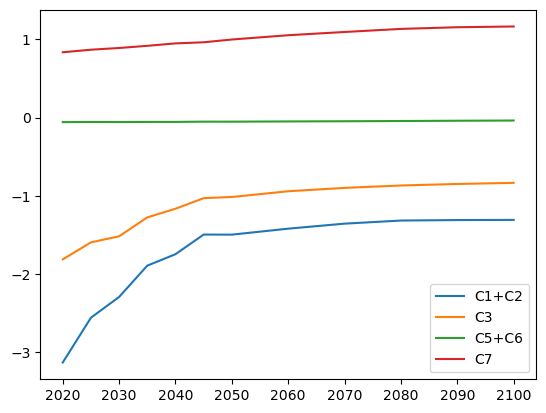

In [28]:
reg = 'USA'
plt.plot(self.app1_gdp_pos.Time, self.app1_gdp_pos.sel(ISO=reg, Category='C1+C2'), label='C1+C2')
plt.plot(self.app1_gdp_pos.Time, self.app1_gdp_pos.sel(ISO=reg, Category='C3'), label='C3')
plt.plot(self.app1_gdp_pos.Time, self.app1_gdp_pos.sel(ISO=reg, Category='C5+C6'), label='C5+C6')
plt.plot(self.app1_gdp_pos.Time, self.app1_gdp_pos.sel(ISO=reg, Category='C7'), label='C7')
plt.legend()

In [29]:
(self.app1_gdp_pos_total / self.app1_gdp_pos_total.sel(ISO='WORLD')).sel(ISO='FRA', Category=['C1+C2', "C3", "C5+C6", "C7"])

<xarray.DataArray (Category: 4)>
array([0.00248052, 0.00366045, 0.00530055, 0.00610614])
Coordinates:
    ISO       <U3 'FRA'
  * Category  (Category) object 'C1+C2' 'C3' 'C5+C6' 'C7'

In [28]:
self.app1_gdp_pos_total.sel(ISO='FRA', Category=['C1+C2', "C3", "C5+C6", "C7"])

<xarray.DataArray (Category: 4)>
array([19.01666047, 19.18098751, 22.78976339, 30.71021278])
Coordinates:
    ISO       <U3 'FRA'
  * Category  (Category) object 'C1+C2' 'C3' 'C5+C6' 'C7'

In [15]:
self.xr_budgets_scenario.sel(ISO='MCO', Category='C1+C2').F2C

<xarray.DataArray 'F2C' (Time: 81)>
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan])
Coordinates:
    Category  <U5 'C1+C2'
    ISO       <U5 'MCO'
  * Time      (Time) int32 2020 2021 2022 2023 2024 ... 2096 2097 2098 2099 2100